# Calculating text similarity between different books.

In this project, we'll analyse text in popular novels to determine the similarity between them. Then we'll create a hierarchy indicating visually how similar the novels are to each other. To do this, we'll convert all of the novels into tokens, individually quantifying the number of words in them. Then we'll create a bag of words model to calculate how unique specific words are to specific novels. This will then help us calculate the similarity between separate novels. Thirteen notable science fiction novels from Project Gutenberg have been downloaded and imported for this project.

In [2]:
# Import library
import glob

# The books files are contained in this folder
folder = "C:/Users/dalin/Dropbox/MachineLearning/SciFi/books/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
files.sort()
files

['C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\A Journey To the Centre of the Earth.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\A Trip to Venus.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\Armageddon.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\Erewhon.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\Flatland.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\In Search of the Unknown.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\The Death World.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\The House on the Borderland.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\The Last Man.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\The Lost World.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\The Monster Men.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\The Time Machine.txt',
 'C:/Users/dalin/Dropbox/MachineLearning/SciFi/books\\Triplanetary.tx

As a first step, we need to load the content of these books into Python and do some basic pre-processing to facilitate the downstream analyses. We call such a collection of texts a corpus. We will also store the titles for these books for future reference and print their respective length to get a gauge for their contents.

In [3]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters. f.read() reads the text and ' ' replaces non-alphanumeric characters with a space.
    data = re.sub('[\W_]+', ' ', f.read())
    # Store the texts and titles of the books in two separate lists
    txts.append(data)
    titles.append(os.path.basename(n).replace(".txt", ""))

# Print the length, in characters, of each book
[len(t) for t in txts]

[486304,
 289678,
 170990,
 471520,
 206622,
 403530,
 325282,
 288366,
 989041,
 424180,
 330901,
 193020,
 536882]

In [4]:
# Browse the list containing all the titles
for i in range(len(titles)):
    # Store the index if the title is "Armageddon"
    if titles[i] == 'Armageddon':
        ori = i

# Print the stored index
print(ori)

2


In the next section, we'll turn words into their lowercase form, remove unnecessary stopwords, and split the text into individual words, or "tokens".

In [5]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [book.lower() for book in txts]

# Transform the text into tokens 
txts_split = [word.split() for word in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

# Print the first 20 tokens for the "Armageddon" book
print(texts[ori][0:20])

['project', 'gutenberg', 's', 'armageddon', '2419', 'd', 'by', 'philip', 'francis', 'nowlan', 'this', 'ebook', 'use', 'anyone', 'anywhere', 'no', 'cost', 'with', 'almost', 'no']


## Creating a Bag of Words model

Now we'll use Gensim to create a bag of words, indicating how many times each word appears in the novel.

In [ ]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts]
print(bows)

# Print the first five elements of the On the Origin of species' BoW model
bows[ori][0:5]

In [7]:
print(dictionary)

Dictionary(28266 unique tokens: ['000', '1', '10', '10s', '11']...)


Now we'll create a table that lists each token next to how many times it occurs.

In [8]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame(bows[ori])
df_bow_origin.head()

# Add the column names to the DataFrame
df_bow_origin.columns =['index', 'occurrences']
df_bow_origin.head()

# Add a column containing the token corresponding to the dictionary index
df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.sort_values(by='occurrences', ascending=False)

,index,occurrences,token
1335,3897,319,it
2716,7770,302,was
2776,7917,277,with
1141,3249,270,had
2738,7829,187,were
...,...,...,...
2493,7123,1,terrified
2496,7129,1,texture
322,932,1,bright
2498,7132,1,thanked


## Calculating text similarity

Next, we'll create a Tfidf model using the bag of words. This model defines the importance of each word depending on how frequent it is in this text and how infrequent it is in all the other documents. As a result, a high tf-idf score for a word will indicate that this word is specific to this text.

In [9]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "Armageddon"
model[bows[ori]]

[(15, 0.0037461639432308075),
 (19, 0.0009394547417882991),
 (22, 0.0047445210477132784),
 (33, 0.0037461639432308075),
 (39, 0.1048925904104626),
 (48, 0.0059259827952538304),
 (49, 0.03825629439888362),
 (50, 0.0024411184842046824),
 (63, 0.004782036799860452),
 (73, 0.004782036799860452),
 (75, 0.0012403641102347242),
 (93, 0.0012403641102347242),
 (95, 0.0024807282204694484),
 (96, 0.00790753507952213),
 (102, 0.002133929509977976),
 (107, 0.0037461639432308075),
 (117, 0.0008535718039911906),
 (119, 0.0008179650144203185),
 (120, 0.0020108464181754562),
 (121, 0.0013405642787836375),
 (140, 0.001581507015904426),
 (141, 0.0013405642787836375),
 (147, 0.0004267859019955953),
 (150, 0.0020108464181754562),
 (157, 0.0037461639432308075),
 (158, 0.0006134737608152388),
 (176, 0.00040898250721015924),
 (178, 0.0012403641102347242),
 (179, 0.002249403789655876),
 (182, 0.00536225711513455),
 (188, 0.00020449125360507962),
 (189, 0.0006134737608152388),
 (190, 0.001581507015904426),
 (19

Now let's display the 10 words that are most specific to the Armageddon book.

In [10]:
# Convert the tf-idf model for "Armageddon" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[ori]])

# Name the columns of the DataFrame id and score
df_tfidf.columns =['id', 'score']

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf["token"] = [dictionary[i] for i in list(df_tfidf["id"])]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values(by='score', ascending=False).head(10)

,id,score,token
3336,12389,0.583206,wilma
2527,11580,0.339525,han
673,3288,0.306050,hans
2501,11554,0.157269,gibbons
2596,11649,0.137610,inertron
2484,11537,0.137610,gangs
1652,8344,0.112594,boss
2336,11389,0.111399,disintegrator
2980,12033,0.111399,repellor
4,39,0.104893,20th


The results of the tf-idf algorithm now return stemmed tokens which are specific to each book. Now that we have a model associating tokens to how specific they are to each book, we can measure how related the books are to each other.

To this purpose, we will use a measure of similarity called cosine similarity and we will visualize the results as a distance matrix, i.e., a matrix showing all pairwise distances between these books.

In [11]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))
sim_df.head()

# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
 print(sim_df)

                                      A Journey To the Centre of the Earth  \
A Journey To the Centre of the Earth                              1.000000   
A Trip to Venus                                                   0.026917   
Armageddon                                                        0.148574   
Erewhon                                                           0.039167   
Flatland                                                          0.015448   
In Search of the Unknown                                          0.028716   
The Death World                                                   0.003804   
The House on the Borderland                                       0.031203   
The Last Man                                                      0.031357   
The Lost World                                                    0.019648   
The Monster Men                                                   0.016574   
The Time Machine                                                

## Visualising text similarity

Let's now see which books are most similar to Armageddon.

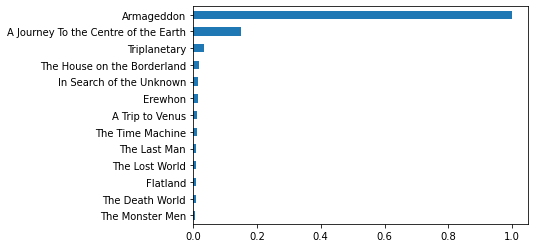

In [12]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['Armageddon']

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
ax = v_sorted.plot.barh()

# Modify the axes labels and plot title for a better readability
# Unfilled - DS

We will represent the whole similarity matrix as a dendrogram, which is a standard tool to display such data. This last approach will display all the information about book similarities at once, indicating which books are most similar to each other. 

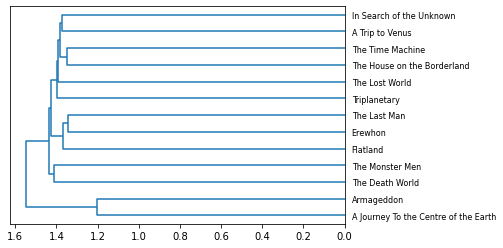

In [13]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
a = hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation='left')

We can also visualise the cluster labels for each book.

In [14]:
from scipy.cluster.hierarchy import fcluster

In [15]:
# Use fcluster to extract labels: labels
labels = fcluster(Z, 0.5, criterion='distance')

In [16]:
# Create a DataFrame with labels and titles as columns: df
df = pd.DataFrame({'labels': labels, 'titles': titles})

In [17]:
df

,labels,titles
0,1,A Journey To the Centre of the Earth
1,10,A Trip to Venus
2,2,Armageddon
3,5,Erewhon
4,7,Flatland
5,11,In Search of the Unknown
6,3,The Death World
7,8,The House on the Borderland
8,6,The Last Man
9,12,The Lost World


In [18]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['titles'])

In [19]:
# Display ct
print(ct)

titles  A Journey To the Centre of the Earth  A Trip to Venus  Armageddon  \
labels                                                                      
1                                          1                0           0   
2                                          0                0           1   
3                                          0                0           0   
4                                          0                0           0   
5                                          0                0           0   
6                                          0                0           0   
7                                          0                0           0   
8                                          0                0           0   
9                                          0                0           0   
10                                         0                1           0   
11                                         0                0           0   